# Student Name: Claire Morley

---
# PHYS4003: Statistics Module Assignment

**Due on Sep 1st, 2025**

**Total points: 50 (15% of the total mark for the unit)**

---

**Academic Integrity**

This is an individual assessment, and you should produce your own work. You may discuss the assignment with your colleagues in the early stages of problem solving, but you should write your own solutions, and should not share solutions with your fellow students. References are required for any external content that you draw on. Asking others (e.g. friends,family, websites, tutors) for answers to questions is contract cheating, and is not permitted

---

**Instructions for the assignment:**
- The assignment is a single Jupyter notebook, containing 3 questions (each with multiple parts).
- You are free to use code snippets from the tutorial notebooks.
- The assignment also has four associated text files, which contain the input data for analysis in the assignment. These files are automatically read in within the notebook. They simply need to be in the same folder as the Jupyter notebook file. If you are running the notebook on your own local setup, you need to download and put them in the same folder as the notebook.
- You should submit your completed notebook as a Jupyter notebook through Blackboard.
- Some questions may require you to define new python variables/functions and test your work by running cells over and over or add new cells for yourself to check/test. This is fine. Just make sure that after you have tested what you return is a clean notebook that runs smoothly and only has the output that is requested in each question.

- Before submission, make sure that your notebook can be executed in a single run from beginning to end. E.g., by clicking the <kbd>Restart & Run All</kbd> under the <kbd>Kernel</kbd> menu. If there are questions/parts that you have left blank or incomplete, which do not allow a complete computational run to be executed, comment them out and add an explanation about your partial work in the same cell (as a python comment block).

In [8]:
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import pymc as pm
import arviz as az
import matplotlib.pylab as plt

sns.set_style("darkgrid")
sns.set_context("talk")
sns.color_palette("hls", 8)

# Setting matplotlib fonts
from matplotlib import rc
font = {'family': 'serif',
        'weight': 'bold',
        'size': '14'}
rc('font', **font)


# Below is a set of colors for matplotlib that is colorblind-friendly
# To use them in plotting commands, you can simply set "color=colorset[N]",
# where N is an integer in [0,16), reflecting the index of the colors below.
colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

## Question 1

we have made $N$ independent measurements of a quantity $Y$, at different values of quantity $X$. Assuming $Y$ is a function of $X$, we want to infer a model for this relationship.

### Data

Our data consists of:

$$ x = [x_1,\cdots,x_N] $$
$$ \hat{y}_{\rm{obs}} = [\hat{y}_1,\cdots,\hat{y}_N] $$
$$ \hat{\sigma} = [\hat{\sigma}_1,\cdots,\hat{\sigma}_N] $$




In [9]:
DATA = pd.read_csv('https://raw.githubusercontent.com/bersavosh/P4003/refs/heads/main/Assignment/q1_data.csv')
DATA.describe()
DATA.head()

,x,y_obs,sigma_obs
0,28.596529,568.880362,19.504356
1,26.133123,519.781986,29.535360
2,22.628710,345.154212,28.748078
3,24.845852,353.495794,21.731303
4,25.180609,491.663958,31.409486


#### Q1 - part I: Visualize the data. [2 points]

Using the methods we have covered in the class, visualize the data.

(array([2., 2., 3., 1., 3., 2., 1., 0., 1., 3., 5., 1., 3., 0., 2., 2., 2.,
        2., 2., 3.]),
 array([10.733567  , 11.66206398, 12.59056095, 13.51905793, 14.44755491,
        15.37605188, 16.30454886, 17.23304584, 18.16154281, 19.09003979,
        20.01853677, 20.94703374, 21.87553072, 22.8040277 , 23.73252468,
        24.66102165, 25.58951863, 26.51801561, 27.44651258, 28.37500956,
        29.30350654]),
 <BarContainer object of 20 artists>)

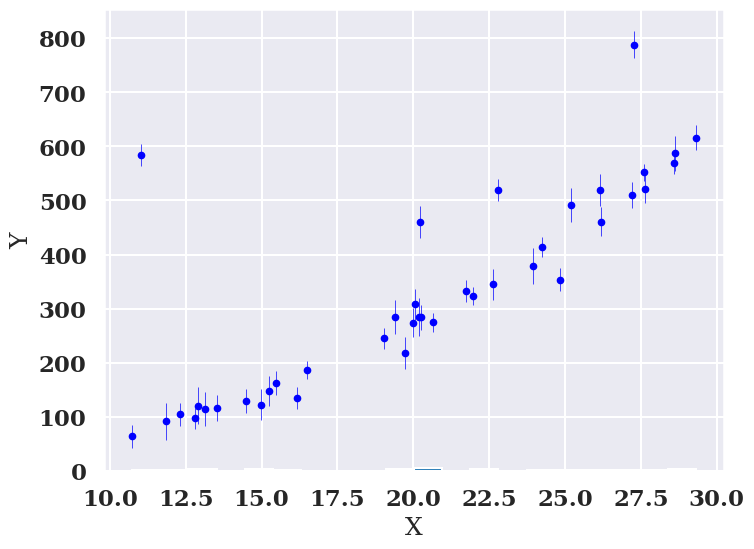

In [10]:
# <your turn>
DATA.describe()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(x=DATA['x'],
            yerr=DATA['sigma_obs'],
            y=DATA['y_obs'],
            fmt='.b', elinewidth=0.5)

# Plot cosmetics
ax.set_xlabel('X')
ax.set_ylabel('Y');
ax.hist(DATA['x'],bins=20)
# sns.displot(DATA,x='x',kind="hist",rug=True, bins=20,aspect=2)
# sns.displot(DATA,x='x',kind="kde",rug=True, aspect=2,bw_adjust=0.2)

### Our model

We propose the following model:

$$ Y_{\rm{Model}}(x; a, b, c) = a x^b + c $$

With the following priors:

$$ a \sim \textrm{Uniform}(\min=0,\max=10) $$
$$ b \sim \textrm{Exponential}(\lambda_b=0.5) $$
$$ c \sim \textrm{Normal}(\mu_c=0,\sigma_c=\frac{a}{b}) $$

and we define

$$ \hat{Y}_{\rm{obs}} \sim \textrm{Normal}(\mu_Y=Y_{\rm{Model}}(x),\sigma_Y=\hat{\sigma}) $$


#### Q1 - part II: Build the model. [5 points]

Build a PyMC model with the variables above and visualize its plate notation.

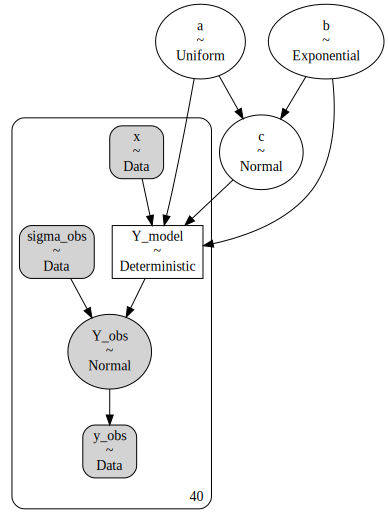

In [11]:
# <your turn>

with pm.Model() as q1_model:
    ## Define your model here

    x=pm.Data('x',DATA['x'])
    y_obs=pm.Data('y_obs',DATA['y_obs'])
    sigma_obs=pm.Data('sigma_obs',DATA['sigma_obs'])


    a=pm.Uniform('a',0,10)
    b=pm.Exponential('b',lam=0.5)
    c=pm.Normal('c',mu=0,sigma=a/b)

    Y_model=pm.Deterministic('Y_model', a * x **b + c)

    Y_obs=pm.Normal('Y_obs',mu=Y_model,sigma=sigma_obs,observed=y_obs)
# your plate notation here

pm.model_to_graphviz(q1_model)

### Prior checking

#### Q1 - part III: Perform prior and prior-predictive checking. [3 points]

Perform the following steps (these can be done in a single cell or in a set of consecutive cells):
- a: Perform prior and prior-predictive sampling from the model with 1000 draws.
- b: Visualize the prior samples for $a, b, c$ in a pair-wise plot, with the marginal distributions plotted as well.
- c: Visualize 68% HDI of $Y_\rm{model}$ and $Y_\rm{obs}$ on top of your data.

In [12]:
# <your turn>
# a:

with q1_model:
    q1_sample_prior_predictive = pm.sample_prior_predictive(draws=1000)

q1_sample_prior_predictive



Inference data with groups:
	> prior
	> prior_predictive
	> observed_data
	> constant_data

array([[<Axes: ylabel='a'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b'>,
        <Axes: xlabel='c'>]], dtype=object)

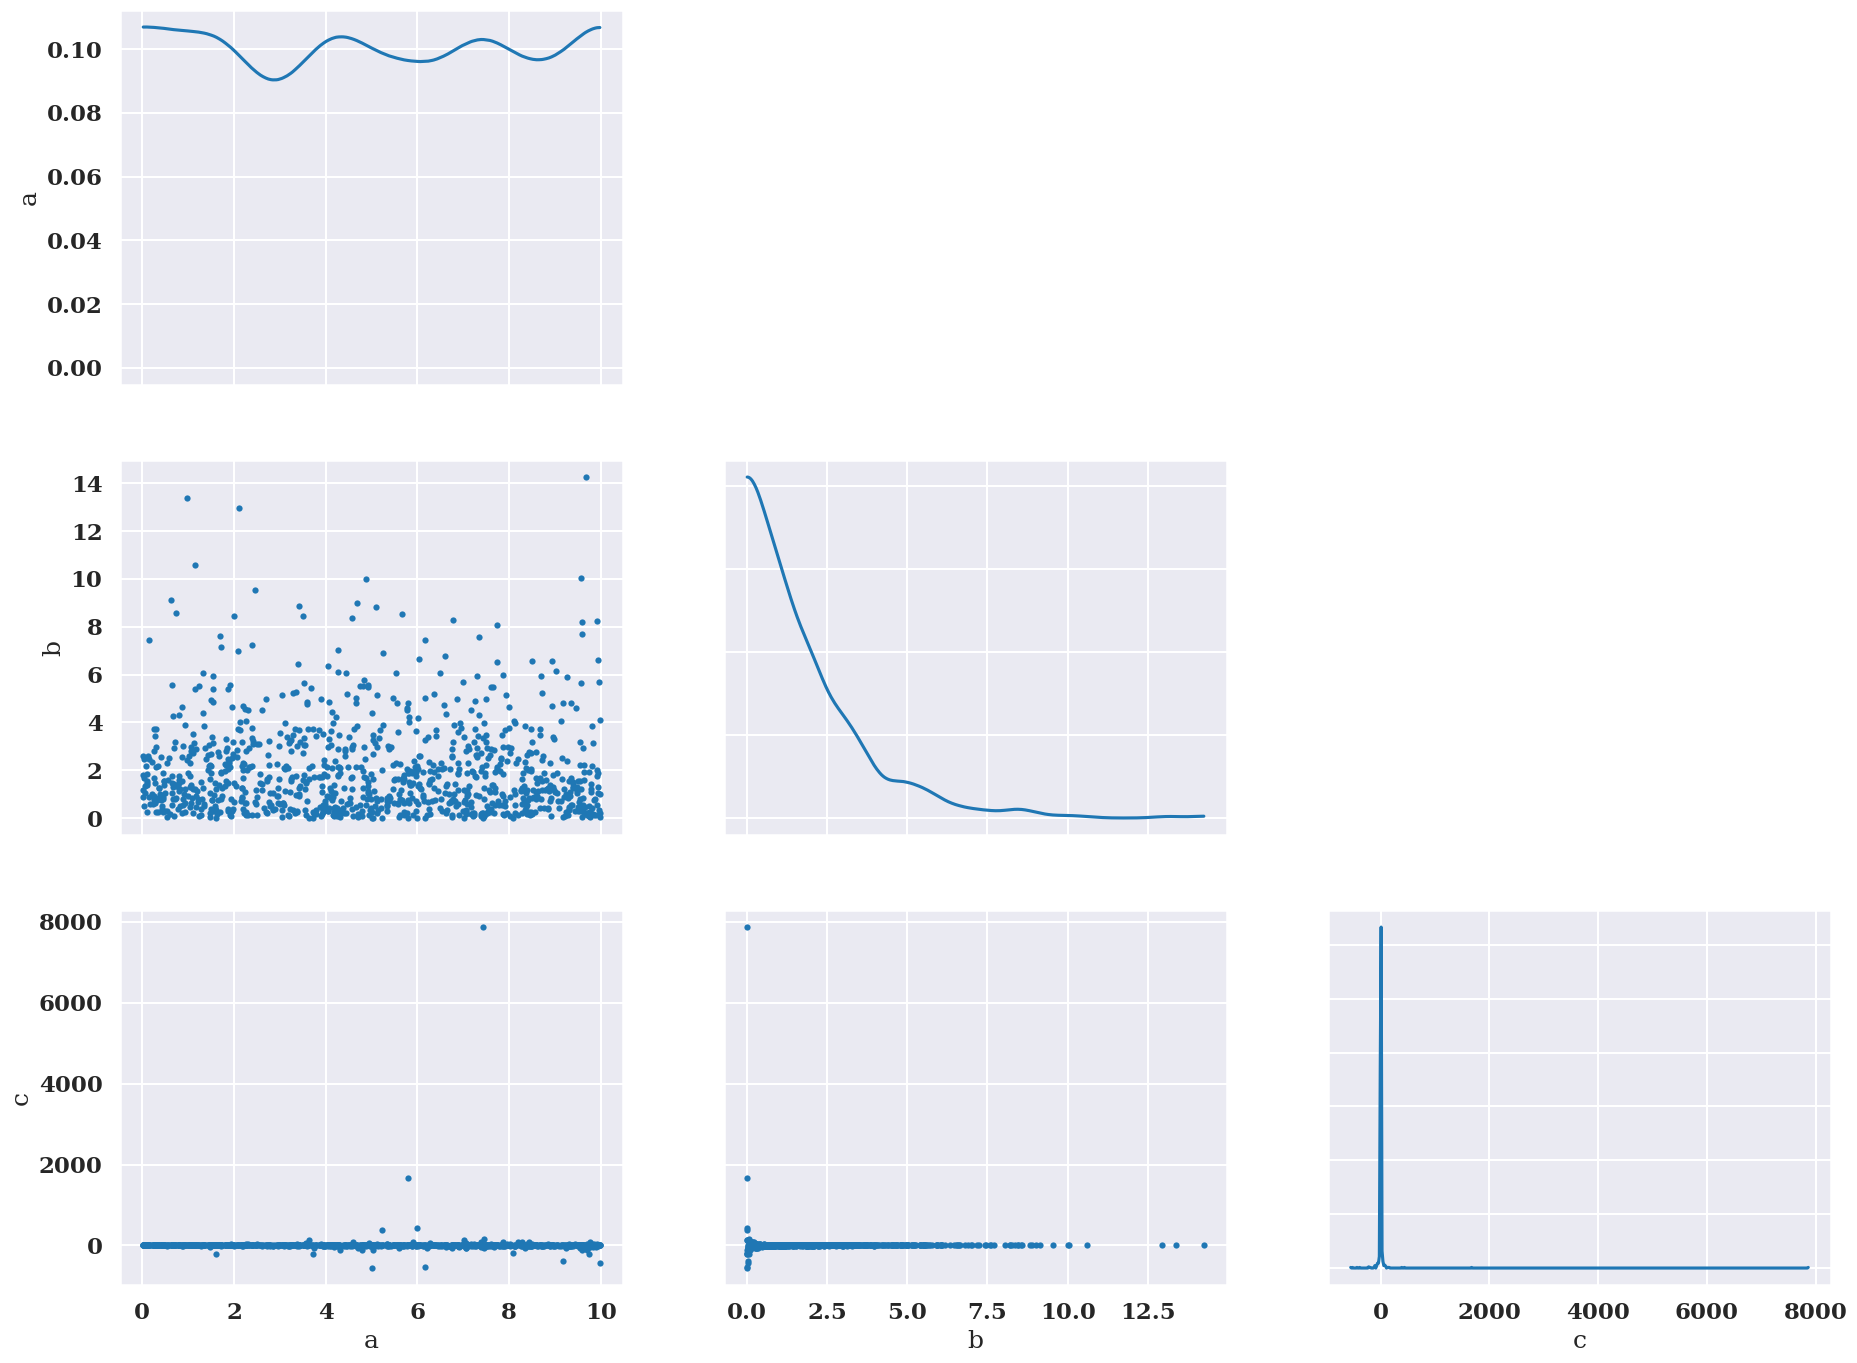

In [13]:
# <your turn>
# b:


# az.plot_density(q1_sample_prior_predictive, group='prior',var_names=["a","b","c"])
az.plot_pair(q1_sample_prior_predictive, group="prior",var_names=["a","b","c"],marginals=True)




/tmp/ipython-input-3462110656.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


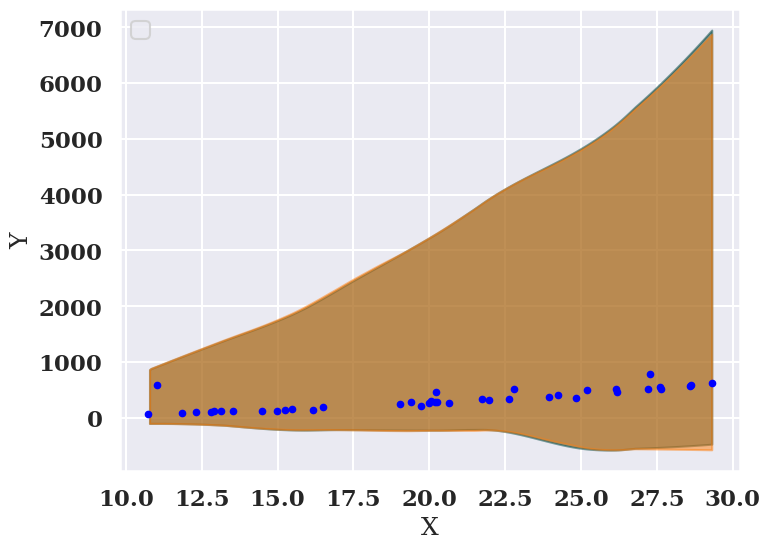

In [35]:
# <your turn>
# c: Visualize 68% HDI of  𝑌model  and  𝑌obs  on top of your data.


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(x=DATA['x'],
            yerr=DATA['sigma_obs'],
            y=DATA['y_obs'],
            fmt='.b', elinewidth=0.5)

az.plot_hdi(q1_sample_prior_predictive.constant_data['x'],q1_sample_prior_predictive.prior['Y_model'],hdi_prob=0.68,fill_kwargs={'color':colorset[2]})
az.plot_hdi(q1_sample_prior_predictive.constant_data['x'],q1_sample_prior_predictive.prior_predictive['Y_obs'],hdi_prob=0.68)
ax.legend()


# Plot cosmetics
ax.set_xlabel('X')
ax.set_ylabel('Y');

# az.plot_hdi(regression_mcmc_sample.constant_data['x'],
#             regression_mcmc_sample.posterior['Y_model'],
#             hdi_prob=0.99,
#             fill_kwargs={'label':r'$Y_{\rm{model}}$ 99% HDI'}
#            )

#### Q1 - part IV: interpret the posterior predictive sampling. [2 points]

Consider your plot of $Y_\rm{model}$ and $Y_\rm{obs}$ on the data. How different $Y_\rm{obs}$ look compared to $Y_\rm{model}$? why do you think that is?

### The posterior

#### Q1 - part V: Perform sampling from the posterior distribution. [4 points]

Perform sampling from the posterior, with sufficient number of warm-up draws and post-warm up samples (you can discard the warm-up sample). Demonstrate convergence of your sampling via appropriate metrics and visualizations (Restrict your inspection to $a,b,c$).

Output()

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c'}>]],
      dtype=object)

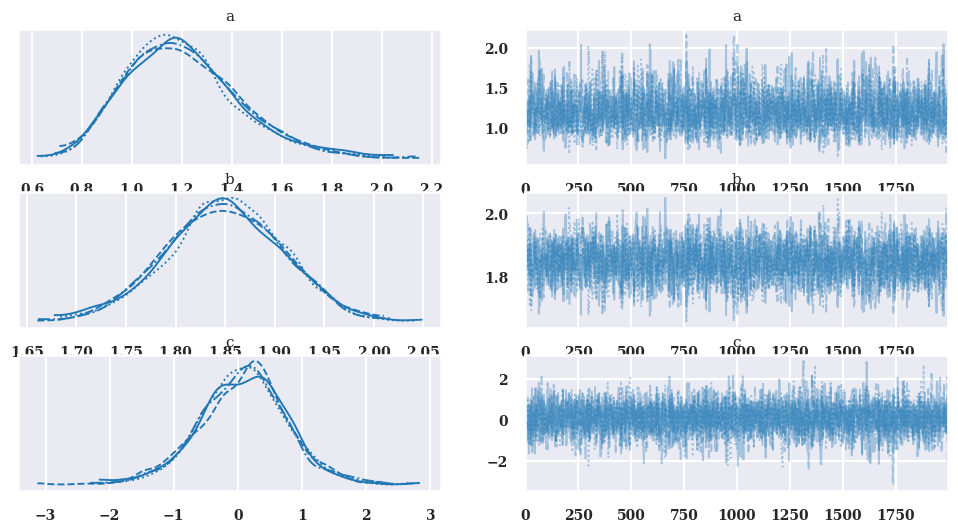

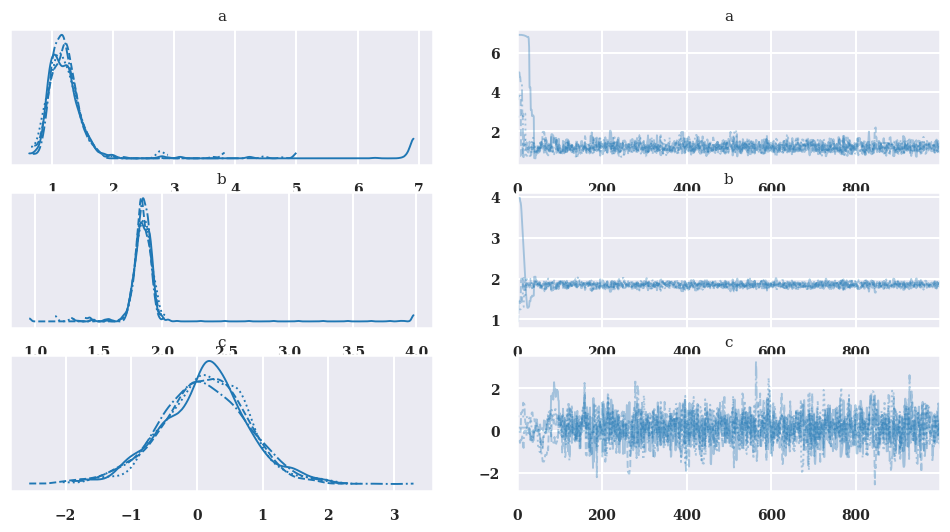

In [39]:
# <your turn>
# You can add aditional cells if needed.

with q1_model:
    q1_mcmc_sample = pm.sample(draws=2000,tune=1000, chains=4, discard_tuned_samples=False)

q1_mcmc_sample

# Posterior
az.plot_trace(q1_mcmc_sample, var_names=['a','b','c']) # this defauls to "regression_mcmc_sample.posterior"

# Warmup
az.plot_trace(q1_mcmc_sample.warmup_posterior, var_names=['a','b','c'])


In [40]:
q1_mcmc_sample

fit_summary = pm.summary(q1_mcmc_sample, var_names=['a','b','c'], hdi_prob=0.68)
fit_summary

,mean,sd,hdi_16%,hdi_84%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.203,0.227,0.918,1.352,0.005,0.004,1981.0,2212.0,1.0
b,1.849,0.058,1.791,1.908,0.001,0.001,1972.0,2286.0,1.0
c,0.084,0.685,-0.542,0.750,0.013,0.012,2979.0,2948.0,1.0


#### Q1 - part VI: Explain your arguments (at least two) in support of convergence for your sampling. [4 points]

#### Q1 - part VII: explore/visualize and comment on any significant correlation between model parameters $a,b,c$ in the posterior. [3 points]

array([[<Axes: ylabel='a'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b'>,
        <Axes: xlabel='c'>]], dtype=object)

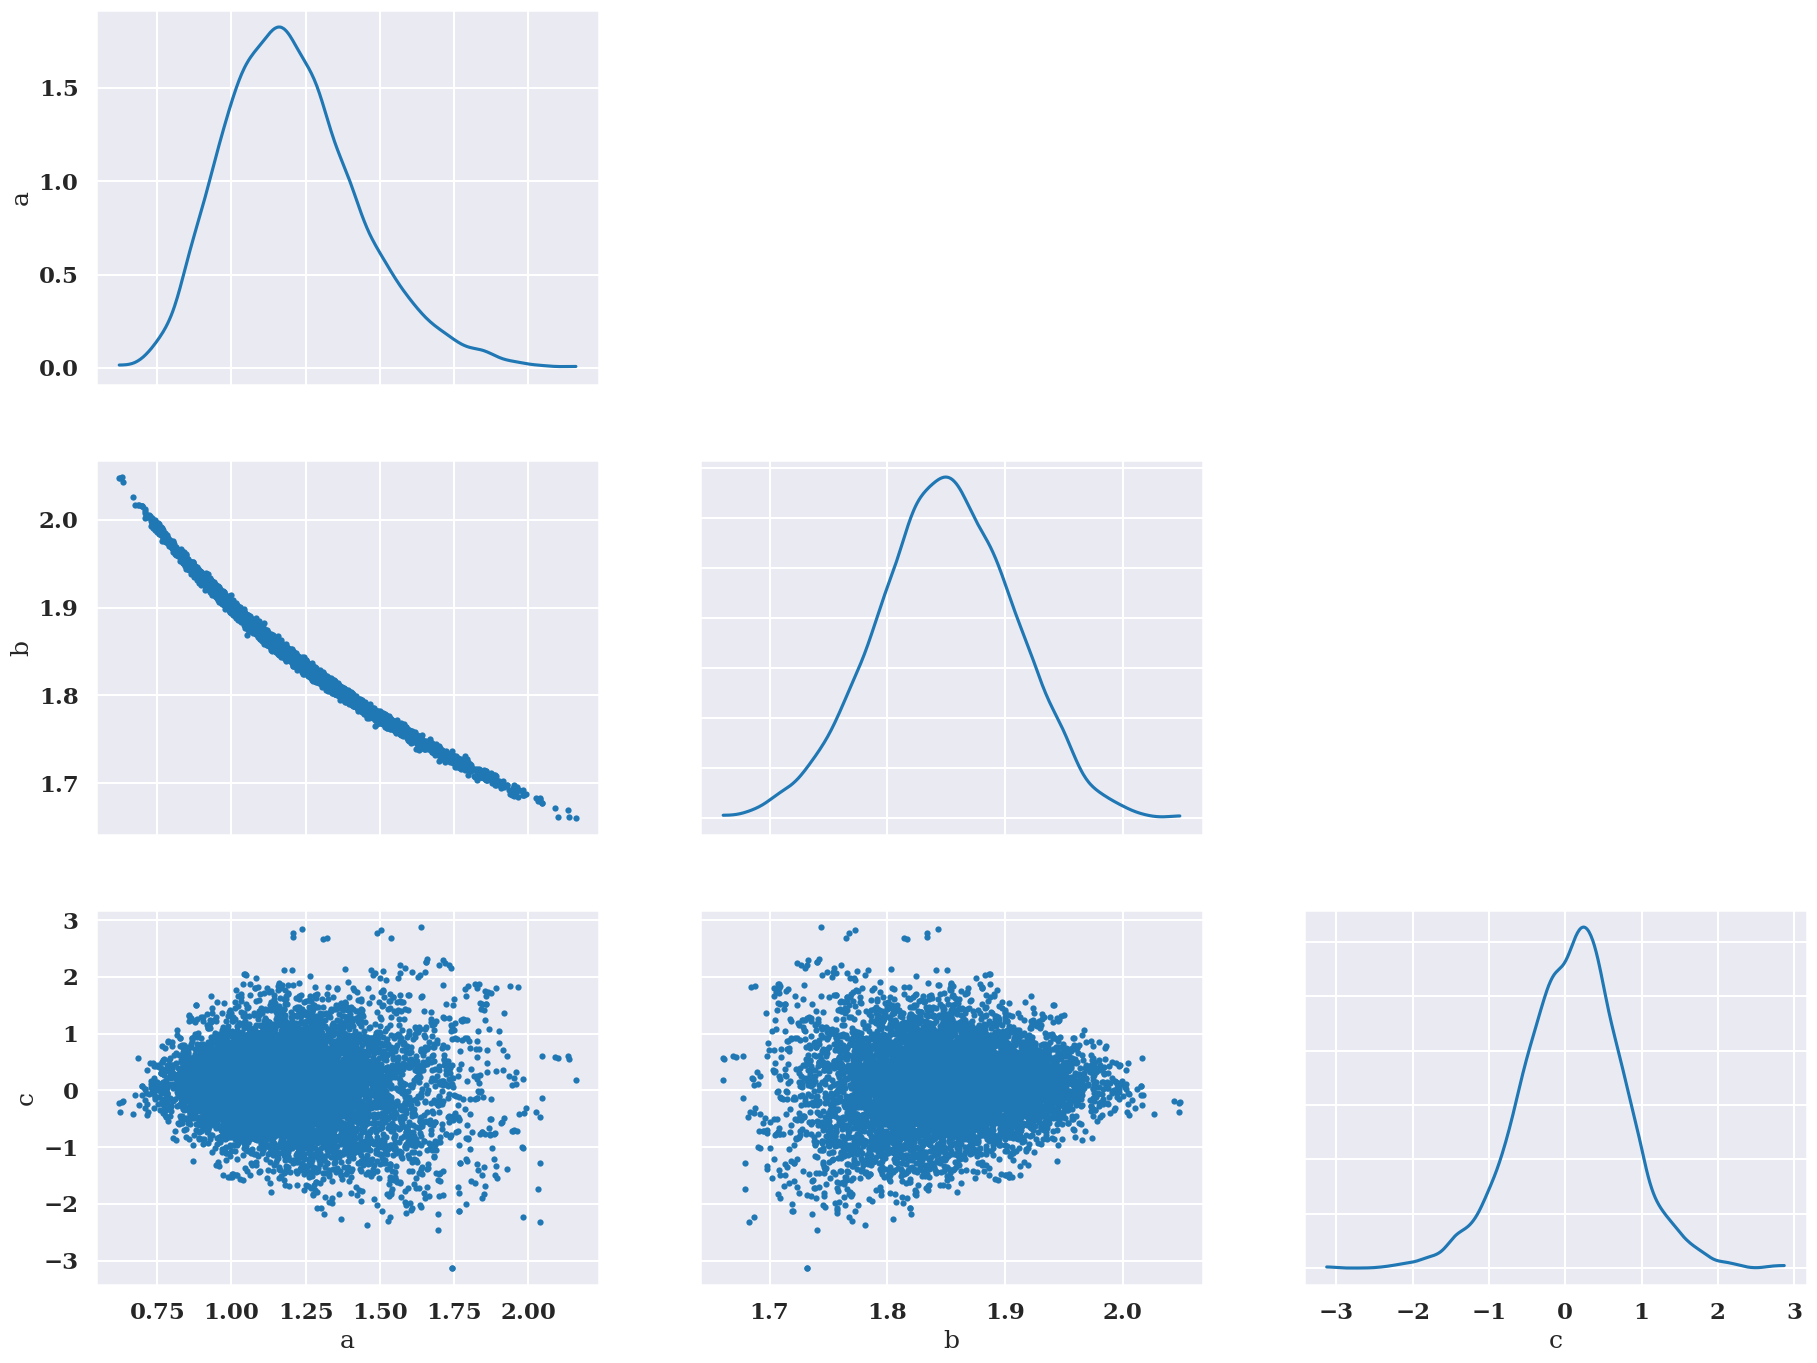

In [41]:
# <your turn>
# Explore correlations in this cell

az.plot_pair(q1_mcmc_sample, group="posterior",var_names=["a","b","c"],marginals=True)


#### Q1 - part VIII: Assess influence of priors. [2 points]

Explore influence of priors on the posteriors for $a,b,c$ and comment whether priors on any parameter has been influential.

In [42]:
# Run this cell once without modification to combine the inference data sets
q1_mcmc_sample.extend(q1_sample_prior_predictive)

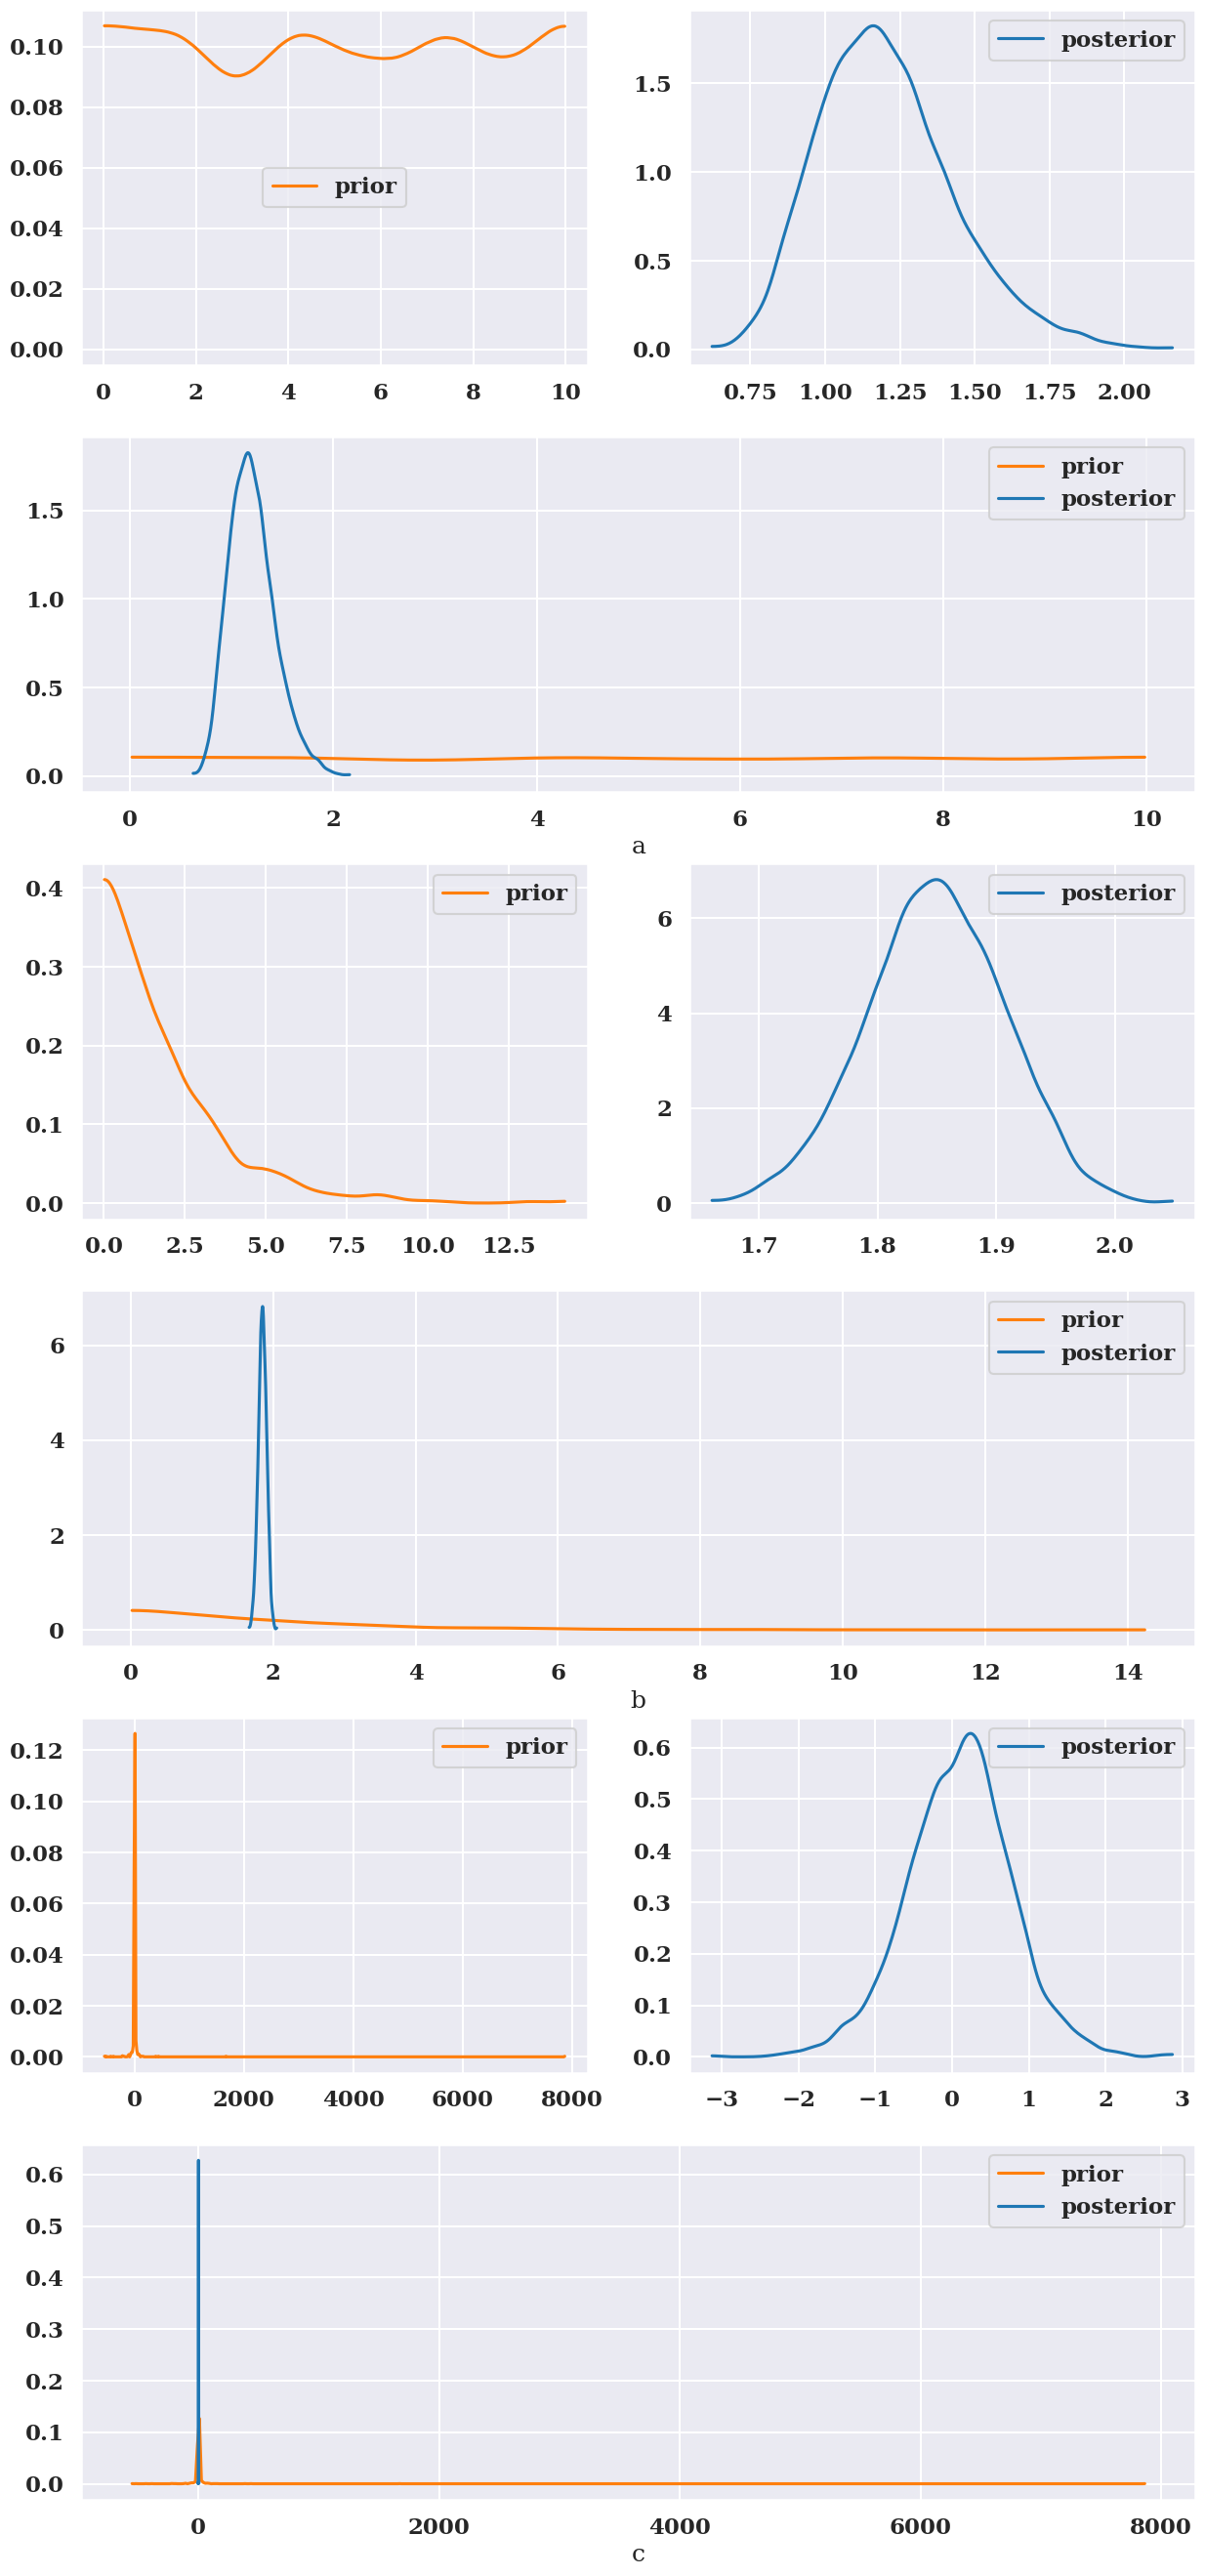

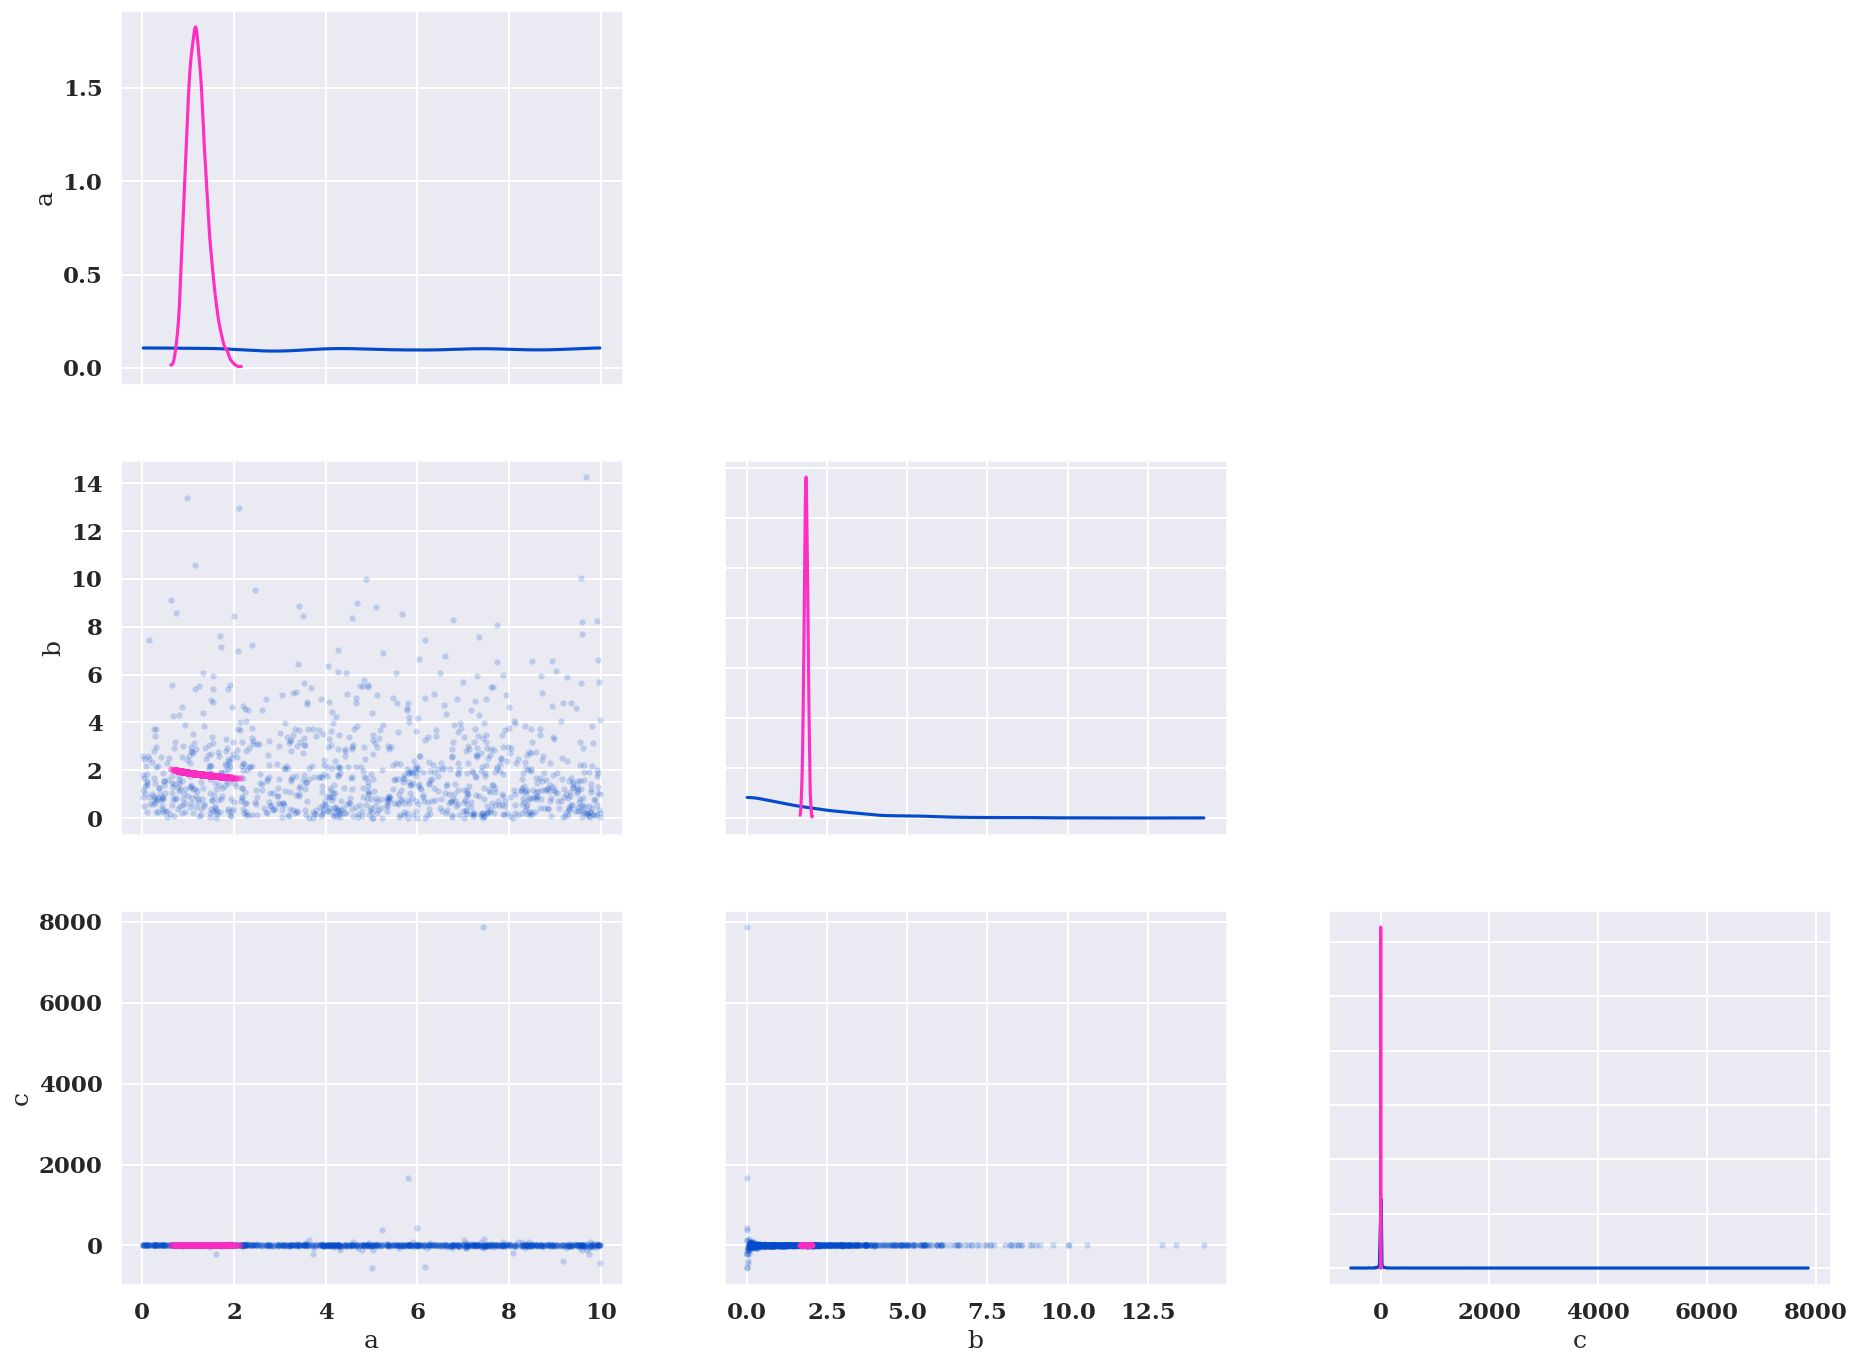

In [47]:
# <your turn>
az.plot_dist_comparison(q1_mcmc_sample,var_names=['a','b','c']);
ax_pw = az.plot_pair(q1_mcmc_sample,
                     group='prior',
                     marginals=True,
                     scatter_kwargs={'alpha': 0.2, 'color': colorset[4]},
                     marginal_kwargs={'color': colorset[4]},var_names=['a','b','c'])


az.plot_pair(q1_mcmc_sample,
             ax=ax_pw,
             marginals=True,
             scatter_kwargs={'alpha': 0.2, 'color': colorset[8]},
             marginal_kwargs={'color': colorset[8]},var_names=['a','b','c']);



### Posterior predictions

#### Q1 - part IX: Perform posterior-predictive sampling and assess the outputs. [4 points]
- a: perform posterior-predictive sampling and store the outputs within the same inference data you have built above.
- b: plot 68% HDI for posterior of $Y_\rm{model}$ and 68% HDI for posterior-predictive of $Y_\rm{obs}$ on top of your data.
- c: repeat step b but for 99% HDI.

In [ ]:
# <your turn>
# a:



In [ ]:
# <your turn>
# b:



In [ ]:
# <your turn>
# c:



#### Q1 - part X: Comment on whether you think the model describes the data in a reasonable manner. [2 points]

## Question 2

### A new model for the same data

We want to try a different statistical representation for the same mathematical model. We propose the following model:

$$ Y_{\rm{Model}}(x; a, b, c) = a x^b + c $$

With the following priors:

$$ a \sim \textrm{Uniform}(\min=0,\max=10) $$
$$ b \sim \textrm{Exponential}(\lambda_b=0.5) $$
$$ c \sim \textrm{Normal}(\mu_c=0,\sigma_c=\frac{a}{b}) $$

The definitions above are the same as question 1. However, now we define

$$ \hat{Y}_{\rm{obs}} \sim \textrm{StudentT}(\mu_Y=Y_{\rm{Model}}(x),\sigma_Y=\hat{\sigma},\nu_Y=\nu) $$

Where $\hat{Y}_{\rm{obs}}$ is now distributed following a [Student T distribution](https://distribution-explorer.github.io/continuous/student_t.html) (PyMC definition [here](https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.StudentT.html)) and consider the following prior:

$$ \nu_Y \sim \textrm{Gamma}(\alpha=7,\beta=4) $$

Where $\textrm{Gamma}$ is the [Gamma distribution](https://distribution-explorer.github.io/continuous/gamma.html) (PyMc definition [here](https://www.pymc.io/projects/docs/en/latest/api/distributions/generated/pymc.Gamma.html)).

#### Q2 - part I: Build the model. [3 points]

Build a PyMC model with the variables above and visualize its plate notation.

In [ ]:
# <your turn>

with pm.Model() as q2_model:
    ## Define your model here

# your plate notation here


### Prior checking

#### Q2 - part II: Perform prior and prior-predictive checking. [3 points]

Perform the following steps (these can be done in a single cell or in a set of consecutive cells):
- a: Perform prior and prior-predictive sampling from the model with 1000 draws.
- b: Visualize the prior samples for $a, b, c, \nu$ in a pair-wise plot, with the marginal distributions plotted as well.
- c: Visusalize 68% HDI of $Y_\rm{model}$ and $Y_\rm{obs}$ on top of your data.

In [ ]:
# <your turn>
# a:

with q2_model:
    q2_sample_prior_predictive =

In [ ]:
# <your turn>
# b:



In [ ]:
# <your turn>
# c:



### The posterior

#### Q2 - part III: Perform sampling from the posterior distribution. [2 points]

Perform sampling from the posterior, with sufficient number of warm-up draws and post-warm up samples (you can discard the warm-up sample). Demonstrate convergence of your sampling via appropriate metrics and visualizations (Restrict your inspection to $a,b,c,\nu$).

In [ ]:
# <your turn>
# You can add aditional cells if needed.

with q2_model:
    q2_mcmc_sample =



#### Q2 - part IV: explore correlation between model parameters $a, b, c, \nu$. Is $\nu$ correlated with any of the other parameters? [2 points]

In [ ]:
# <your turn>
# Explore correlations in this cell



#### Q2 - part V: Assess influence of priors. [3 points]

Our new model has a new parameter. Hence we need to assess influence of priors for all parameters. Assess and comment whether priors on any parameter has been influential.

In [ ]:
# Run this cell once without modification to combine the inference data sets
q2_mcmc_sample.extend(q2_sample_prior_predictive)

In [ ]:
# <your turn>



### Posterior predictions

#### Q2 - part VI: Perform posterior-predictive sampling and assess the outputs. [2 points]
- a: perform posterior-predictive sampling and store the outputs within the same inference data you have built above.
- b: plot 68% HDI for posterior of $Y_\rm{model}$ and 68% HDI for posterior-predictive of $Y_\rm{obs}$ on top of your data.
- c: repeat step b but for 99% HDI.

In [ ]:
# <your turn>
# a:



In [ ]:
# <your turn>
# b:



In [ ]:
# <your turn>
# c:



## Question 3

#### Q3 - part I: Visualize marginal posterior samples of $a,b,c$ from models in Question 1 and 2. The plot should show value of posterior median as posterior point-estimate and 95% HDI as interval estimate for each parameter. [2 points]

In [ ]:
# <your turn>



#### Q3 - part II: Compare the models in question 1 and 2. Which one appear to be a better model? Why? [2 points]

**End of questions**

Make sure that you:

- [x] Typed in your name in the first cell of the Notebook.
- [x] Saved the Notebook after your modifications.
- [x] Cleaned the Notebook: if you have added cells/work to test items that are not requested, remove them.
- [x] Tested the Notebook and that the notebook can be executed in a single sequential run. E.g., by clicking the <kbd>Restart & Run All</kbd> under the <kbd>Kernel</kbd> menu.
- [x] Make sure that every cell that should have an output, has an output displayed.
- [x] If you're using Binder, save and download the completed Notebook.
- [x] Upload the finished notebook to Blackboard (as Jupyter Notebook or PDF)

**End of assignmnet**